In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [11]:
num_qubits = 4

In [8]:
def UsefulAnsatz(num_qubits, params):
    index = 0
    qc = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        qc.rx(params[index], i)
        index += 1
    for i in range(num_qubits):
        qc.rz(params[index], i)
        index += 1
    for i in range(0, num_qubits, 2):
        qc.rzz(params[index], i, i+1)
        index += 1
    for i in range(1, num_qubits-1, 2):
        qc.rzz(params[index], i, i+1)
        index += 1
    return qc

In [12]:
ansatz = UsefulAnsatz(num_qubits, [np.pi/2] * 16)

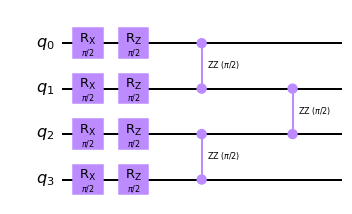

In [13]:
ansatz.draw('mpl')

In [16]:
!pip install pennylane
import pennylane as qml

     |████████████████████████████████| 631 kB 25.0 MB/s eta 0:00:01
  Using cached semantic_version-2.6.0-py3-none-any.whl (14 kB)
  Using cached autoray-0.2.5-py3-none-any.whl (16 kB)
  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
     |████████████████████████████████| 4.3 MB 78 kB/s s eta 0:00:01            | 2.0 MB 34.3 MB/s eta 0:00:01
  Using cached autograd-1.3-py3-none-any.whl
  Using cached future-0.18.2-py3-none-any.whl


In [19]:
dev = qml.device("default.qubit", wires=4, shots=1024)
@qml.qnode(dev)
def UsefulAnsatzPennylane(num_qubits, params):
    index = 0
    for i in range(num_qubits):
        qml.RX(params[index], wires=i)
    for i in range(num_qubits):
        qml.RX(params[index], wires=i)
    for i in range(0,num_qubits,2):
        qml.MultiRZ(params[index], wires=[i,i+1])
    for i in range(1,num_qubits-1,2):
        qml.MultiRZ(params[index], wires=[i,i+1])
    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]

In [20]:
UsefulAnsatzPennylane(num_qubits, [np.pi/2] * 16)

tensor([-1., -1., -1., -1.], requires_grad=True)